<a href="https://colab.research.google.com/github/avkornaev/pytorchBasics2023/blob/main/13_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Import libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

Initialization

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
input_size = 784
hidden_size = 100
num_classes = 10

num_epochs = 2
batch_size = 100
lr = 0.001

Dataset and dataloader

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor())

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,shuffle=False)


In [ ]:
examples = iter(train_loader)
inputs, labels = next(examples)

print(inputs.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


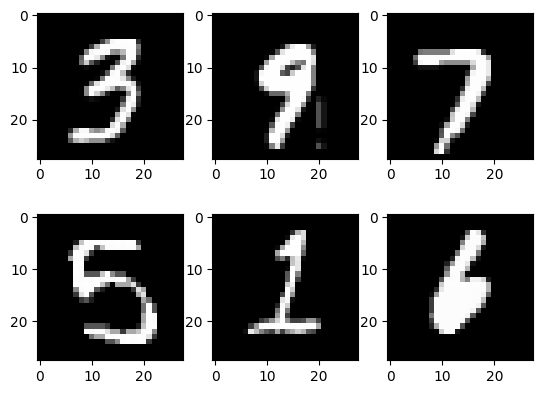

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(inputs[i][0],cmap='gray')

Model

In [ ]:
class NeuralNet(nn.Module):

  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

Loss and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Training

In [ ]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs,labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print
    if (i) % 100 == 0:
      print(f'Epoch[{epoch+1}/{num_epochs}], step [{i+1}/{n_total_steps}], loss: {loss.item():.4f}')

Epoch[1/2], step [1/600], loss: 2.3025
Epoch[1/2], step [101/600], loss: 0.3871
Epoch[1/2], step [201/600], loss: 0.4146
Epoch[1/2], step [301/600], loss: 0.2761
Epoch[1/2], step [401/600], loss: 0.3944
Epoch[1/2], step [501/600], loss: 0.3179
Epoch[2/2], step [1/600], loss: 0.4111
Epoch[2/2], step [101/600], loss: 0.3032
Epoch[2/2], step [201/600], loss: 0.1874
Epoch[2/2], step [301/600], loss: 0.1193
Epoch[2/2], step [401/600], loss: 0.0653
Epoch[2/2], step [501/600], loss: 0.2004


Test

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions==labels).sum().item()

  acc = n_correct / n_samples

In [ ]:
acc

0.9479